### Stefenie Pickston
#### 1506427

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wisconsin-breast-cancer-cytology-features/wisconsin_breast_cancer.csv


#### Load and split the data. 

In [2]:
# Load the dataset. 
df = pd.read_csv (os.path.join(dirname, filename))
# Check
print("Dataset loaded...")

Dataset loaded...


In [3]:
# Check the dataset.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   adhesion   699 non-null    int64  
 5   single     699 non-null    int64  
 6   nuclei     683 non-null    float64
 7   chromatin  699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   mitosis    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [4]:
# Required importing of libraries
from sklearn.model_selection import train_test_split

# Replace all NULL values
df = df.fillna(0)

# Split data into train and test in 'stratified' way (90:10)
x = df.iloc[:, 1:10]
y = df.iloc[:, 10]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, stratify = y, random_state = 1506427)

# Check
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(629, 9) (70, 9) (629,) (70,)


Using the SGDClassifier Library to fit the data, as a preliminary check

In [5]:
# Import the SGDClassifier Library
from sklearn.linear_model import SGDClassifier

# Set the random state and fit the data, for testing purposes 
# commented out as this is done in the for loop later
'''sgd_clf = SGDClassifier(random_state = 1506427)
sgd_clf.fit(x_train, y_train)'''

print("SGD Libraries imported")

SGD Libraries imported


Separating all of the possible cross validation sets

In [6]:
# function to list all non empty subsets
def nonempty_subsets(lst):
     n = len(lst)
     for i in range(1, 1<<n):
             yield [lst[j] for j in range(n) if ((1 << j) & i) > 0]

# testing that all subsets are printed out given a particular example
for subset in nonempty_subsets(['a', 'b', 'c']):
    print(subset)

# use x.columns to get the stratified data to print all subsets out
'''for subset in nonempty_subsets(x.columns):
    print(subset)'''

['a']
['b']
['a', 'b']
['c']
['a', 'c']
['b', 'c']
['a', 'b', 'c']


'for subset in nonempty_subsets(x.columns):\n    print(subset)'

In [7]:
# putting the column subsets into a list
sub_list = list(nonempty_subsets(x.columns))

Generating cross validation scores for the training dataset, and scores for the test dataset

In [8]:
# importing the libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# creating a list for all the scores
scores = [] # training means
actual_scores = [] # test scores

for subset in nonempty_subsets(x.columns):
    # setting up the SGD Classifier
    sgd_clf = SGDClassifier(random_state = 1506427)
    # getting the x_train subset
    xsub = x_train[subset] 
    # apply cross validation to the training data x_train subset and y_train
    sc = cross_val_score(sgd_clf, xsub, y_train, cv=3, scoring = 'accuracy') # add this to a list
    # fit the training data
    sgd_clf.fit(xsub, y_train)
    # generate scores for the test data
    actual_test_score =  sgd_clf.score(x_test[subset],y_test)
    # appending values to the lists
    actual_scores.append(actual_test_score)
    scores.append(sc.mean()) # get the mean as cross_val_score returns a lot of data
    
# print the lists
print(scores)
print(actual_scores)

[0.8299156983367509, 0.9189261031366295, 0.9411559201032885, 0.8824257613731298, 0.9411407306144147, 0.9411635148477253, 0.9522746259588364, 0.8537404116351485, 0.9284651021493127, 0.9316245158350421, 0.9459557985873775, 0.9347991190096453, 0.9507025138604086, 0.9506949191159717, 0.9523050049365839, 0.8981924508240299, 0.8966051492367283, 0.9268474215842636, 0.9538771170350118, 0.9300524037366142, 0.9491076175286701, 0.9364016100858206, 0.9570593149540518, 0.8919040024303181, 0.9506949191159717, 0.9268550163287005, 0.945933014354067, 0.9252753094858358, 0.9491304017619807, 0.9443305232778917, 0.9538847117794486, 0.9157135262398421, 0.9379813169286854, 0.9618364092048303, 0.9681932102984735, 0.9459254196096301, 0.9665755297334245, 0.9602415128730918, 0.9729475203159414, 0.9045644414065467, 0.9490924280397964, 0.9538923065238855, 0.9586466165413534, 0.9554720133667501, 0.9697729171413383, 0.952297410192147, 0.9618288144603934, 0.9316473000683527, 0.949115212273107, 0.9459254196096301, 0.

The best cross validation scores are the highest. Therefore we must find the largest value in the training and test lists.

In [9]:
subset_best = max(scores) # save the largest element
actual_best = max(actual_scores)

index_s = scores.index(subset_best) # save the index of the largest element in the original list
index_a = actual_scores.index(actual_best)

# print out the last element
print("The best subset is :" , sub_list[index_s])
print("With a value of: " , subset_best)
print("The best test value is: " , actual_best)

The best subset is : ['thickness', 'shape', 'adhesion', 'nuclei', 'mitosis']
With a value of:  0.9745424166476798
The best test value is:  0.9714285714285714


Which subset gives the best cross-validation scores?
The subset with the highest accuracy value. The best subset is : ['thickness', 'shape', 'adhesion', 'nuclei', 'mitosis'] with a value of:  0.9745424166476798

What is the accuracy of this subset on the test data?
The highest accuracy on test data is 0.9714285714285714 which is actually lower than the highest cross validation score

Is that the best possible test data accuracy?
Not necesarily, there are different subsets that give different/better accuracy in the training data cross validation

Plotting the SGD data in a scatter plot

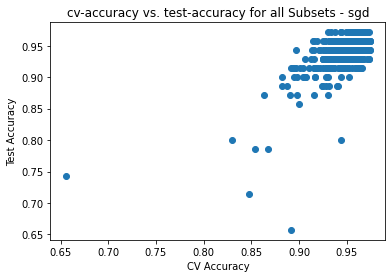

In [10]:
# import plotting libraries
import matplotlib.pyplot as plt

# generating a scatter plot for all subsets using pyplot
# y values from cross valid
# y2 actual_scores
plt.scatter(scores, actual_scores)
plt.title('cv-accuracy vs. test-accuracy for all Subsets - sgd')
plt.xlabel('CV Accuracy')
plt.ylabel('Test Accuracy')
plt.show()


Now we will repeat the same process with the RandomForrestClassifier

In [11]:
# Import the RandomForrestClassifier
from sklearn.ensemble import RandomForestClassifier

# creating a list for all the scores
scores = [] # training means
actual_scores = [] # test scores

for subset in nonempty_subsets(x.columns):
    # setting up the SGD Classifier
    rfc_clf = RandomForestClassifier(n_estimators = 35, random_state = 1506427) # is depth trees
    # getting the x_train subset
    xsub = x_train[subset] 
    # apply cross validation to the training data x_train subset and y_train
    sc = cross_val_score(rfc_clf, xsub, y_train, cv=3, scoring = 'accuracy') # add this to a list
    # fit the training data
    rfc_clf.fit(xsub, y_train)
    # generate scores for the test data
    actual_test_score =  rfc_clf.score(x_test[subset],y_test)
    # appending values to the lists
    actual_scores.append(actual_test_score)
    scores.append(sc.mean()) # get the mean as cross_val_score returns a lot of data
    
# print the lists
print(scores)
print(actual_scores)

[0.8616617300827828, 0.9109895952001215, 0.934814308498519, 0.9094098883572567, 0.928449912660439, 0.9300524037366142, 0.9427356269461532, 0.8457583352320194, 0.9205285942128048, 0.9205058099794942, 0.945933014354067, 0.9014354066985645, 0.9411635148477253, 0.931632110579479, 0.949115212273107, 0.8981924508240299, 0.9173463962937648, 0.9268778005620111, 0.938004101161996, 0.9427584111794638, 0.9554947976000608, 0.9538847117794486, 0.949115212273107, 0.8950026581605529, 0.9347991190096453, 0.9236652236652237, 0.9491228070175438, 0.9411711095921622, 0.9570669096984886, 0.9522898154477102, 0.9570745044429255, 0.9109516214779373, 0.9554644186223133, 0.9554872028556239, 0.9650186071238703, 0.9475127211969316, 0.9618212197159566, 0.9538771170350118, 0.9618364092048303, 0.9236956026429711, 0.9570593149540517, 0.9538999012683224, 0.9634237107921318, 0.9491379965064176, 0.9650034176349965, 0.9570669096984886, 0.9666135034556086, 0.9316245158350421, 0.949115212273107, 0.9602567023619656, 0.96341

Now to find the highest scores from the RandomForrestClassifier

In [12]:
subset_best = max(scores) # save the largest element
actual_best = max(actual_scores)

index_s = scores.index(subset_best) # save the index of the largest element in the original list
index_a = actual_scores.index(actual_best)

# print out the last element
print("The best subset is :" , sub_list[index_s])
print("With a value of: " , subset_best)
print("The best test value is: " , actual_best)

The best subset is : ['thickness', 'shape', 'adhesion', 'single', 'nuclei', 'nucleoli', 'mitosis']
With a value of:  0.9745500113921167
The best test value is:  0.9714285714285714


Which subset gives the best cross-validation scores? The subset with the highest accuracy value. The best subset is : ['thickness', 'shape', 'adhesion', 'single', 'nuclei', 'nucleoli', 'mitosis'] with a value of: 0.9745500113921167

What is the accuracy of this subset on the test data? The highest accuracy on test data is 0.9714285714285714 which is actually lower than the highest cross validation score

Is that the best possible test data accuracy? Again not necesarily, there are different subsets that give different/better accuracy in the training data cross validation

Plotting the RFC data in a scatter plot

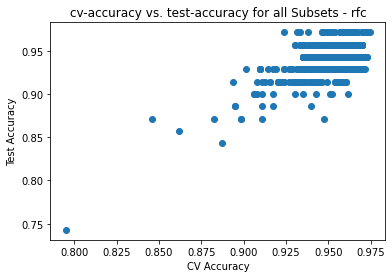

In [13]:
# import plotting libraries
import matplotlib.pyplot as plt

# generating a scatter plot for all subsets using pyplot
# y values from cross valid
# y2 actual_scores
plt.scatter(scores, actual_scores)
plt.title('cv-accuracy vs. test-accuracy for all Subsets - rfc')
plt.xlabel('CV Accuracy')
plt.ylabel('Test Accuracy')
plt.show()